34657 34657 34657


(-2.0, 2.0)

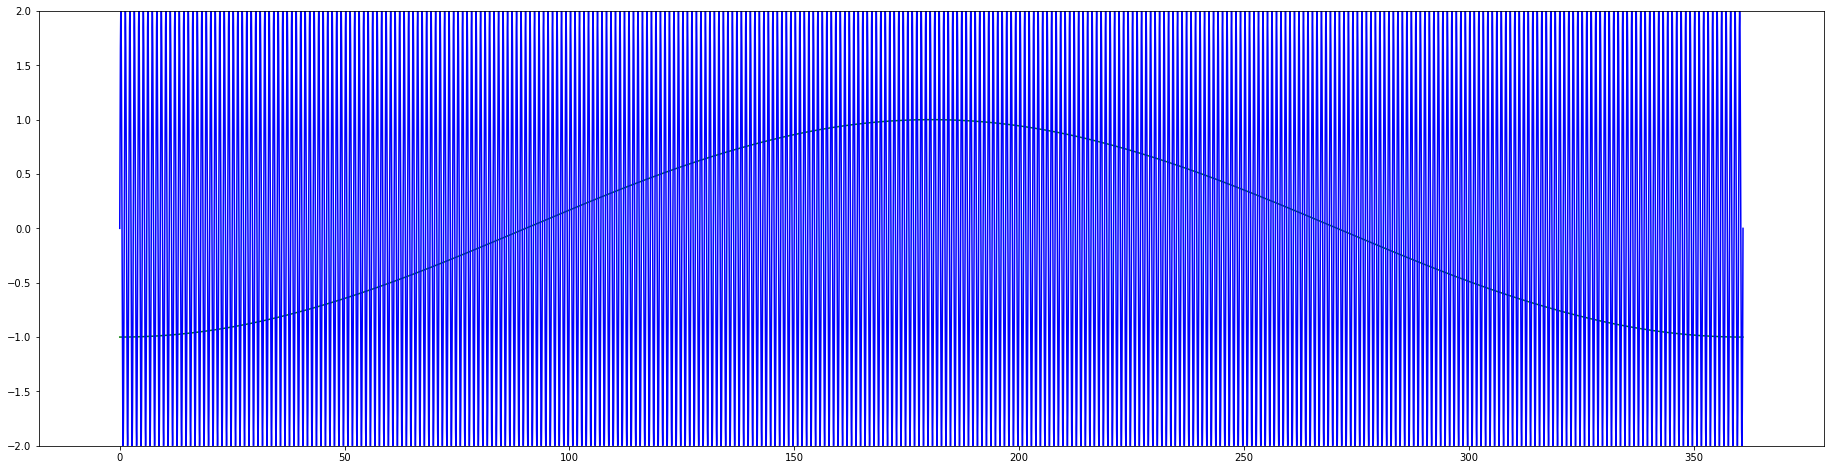

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from pygam import LinearGAM

np.random.seed(11)
tau1 = 361 #361
tau2 = 1 #361
T =361
N = T*24*4+1
t_ = np.linspace(0,T,N)
a0 =4 
a1 = 1
a2 = 2
phi1 = np.pi/2
phi2 = 0
Q0 = a0*np.ones(N)
Q1 = a1*np.sin(t_/tau1*2*np.pi-phi1)
Q2 = a2*np.sin(t_/tau2*2*np.pi-phi2)

print( len(t_),tau1*24*4+1,len(Q0))
fig, axs = plt.subplots(1,1,figsize=(32,8))
ax = axs 
ax.plot(t_,Q0,'r-')
ax.plot(t_,Q1,'g-')
ax.plot(t_,Q2,'b-')
ax.set_ylim([-2,2])

In [2]:
# flow rate simulation, sine waves modulated with piece-wise linear function

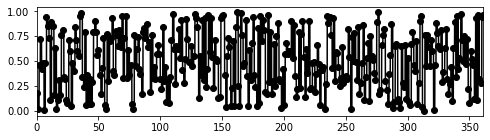

In [3]:
degree = 0
period =1
Ak = np.random.rand(int(tau1/period)+1)
knot = np.arange(0,tau1+1,period)

def PWLin(t,knot,Ak):
    index = np.where(knot<=t)[0][-1]
    return Ak[index]

A = [PWLin(t,knot,Ak) for t in t_]

fig, axs = plt.subplots(1,1,figsize=(8,2))
ax = axs 
ax.plot(knot, Ak,'ko')
ax.plot(t_, A,'k-')
'''
ax.plot(t_,(Q0+Q1+Q2),'r-');
ax.plot(t_,Q,'b-');
'''
ax.set_xlim([0,T])
Q= (Q0+Q1+Q2)*A

In [4]:
def Qfun(t,a0,a1,a2,tau1,tau2,phi1,phi2):
    q0 = a0
    q1 = a1*np.sin(t/tau1*2*np.pi-phi1)
    q2 = a2*np.sin(t/tau2*2*np.pi-phi2)
    a = PWLin(t,knot,Ak)
    q = a*(q0+q1+q2)
    return q

# Tank level simulation

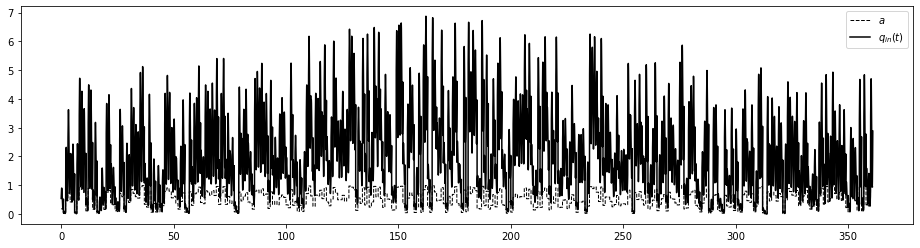

In [5]:
fig, axs = plt.subplots(1,1,figsize=(16,4))
ax = axs 
ax.step(t_, A,'k--',label='$a$',lw=1)
ax.plot(t_,Q,'k-',label='$q_{in}(t)$');
ax.legend();

data = np.vstack([t_,A,Q]).T

import pickle
filename = 'result_step1_FLOW.pckl'
outfile = open(filename,'wb')
pickle.dump(data,outfile)
outfile.close()


(34657, 2)


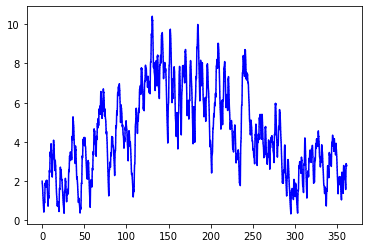

In [6]:
def tank(y, t, ufun):

    u = ufun(t)
    
    A = 1
    dydt = 1/A*(u-np.sqrt(y))

    return dydt

from scipy.integrate import odeint
y0 = 2
qfun = lambda t: Qfun(t,a0,a1,a2,tau1,tau2,phi1,phi2)
sol = odeint(tank, y0, t_, args=(qfun,))

import matplotlib.pyplot as plt

y = sol[:, 0]
data = np.vstack([t_,y]).T
print(data.shape)
plt.step(data[:,0], data[:,1], 'b', label='theta(t)');
plt.show()


In [7]:
import pickle
filename = 'result_step1_LEVEL.pckl'
outfile = open(filename,'wb')
pickle.dump(data,outfile)
outfile.close()

In [8]:
np.any(data[:,1]==0)

False